# Importar e instalar Pacotes

In [ ]:
#Gráficos e estatísticas dos modelos testados
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 29.1 MB/s 


In [ ]:
import shap

In [ ]:
#!pip install lightgbm

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from scipy.stats import describe,loguniform,wilcoxon
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_predict
from collections import Counter
from sklearn.preprocessing import MinMaxScaler,RobustScaler,OneHotEncoder
import lightgbm as ltb
import pickle

In [ ]:
#Matriz de confusão dos algoritmos testados
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve,auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold,ShuffleSplit,StratifiedShuffleSplit,RepeatedStratifiedKFold
import time
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
!pip install BorutaShap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from BorutaShap import BorutaShap
import scipy.stats

In [ ]:
pd.set_option('max_colwidth', -1)

# Funções para gerar gráficos

In [ ]:
def matriz_confusao(y_test, y_predict,modelo,nome):
    matriz_conf = confusion_matrix(y_test, y_predict)
    fig = plt.figure()
    ax = plt.subplot()
    sns.heatmap(matriz_conf, annot=True, cmap='Blues', ax=ax,fmt='g');
    ax.set_xlabel('Valor Predito');
    ax.set_ylabel('Valor Real'); 
    ax.set_title('Matriz de Confusão - '+nome); 
    #ax.xaxis.set_ticklabels(modelo.classes_);
    #ax.yaxis.set_ticklabels(modelo.classes_);
    ax.xaxis.set_ticklabels([0,1]);
    ax.yaxis.set_ticklabels([0,1]);
    #plt.close()
    plt.show()
    return fig

In [ ]:
def plotresult(crossval, tests, metrica):
  plt.figure(figsize=(24,10))
  plt.clf()
  plt.plot(range(len(crossval)),crossval,
          label="Cross_validate por iteração com RepeatedStratifiedKFold")
  plt.plot(range(len(tests)),tests,
          label="Teste por iteração train_test_split (30%,shuffle e stratify em target)")
  plt.xlabel("iterações")
  plt.ylabel(metrica)
  plt.legend()
  plt.show()
  plt.close()

In [ ]:
def boxplot_sorted(modelos_,resultadosmodel, metric, by=['Technique'], rot=90, figsize=(18,8), fontsize=24, section='Demographics'):
    df2  = pd.DataFrame({modelos_[i][0]:resultadosmodel[i][metric] for i in range(0,len(modelos_))})
    meds = df2.median().sort_values(ascending=False)
    #by = [modelos_[i][0] for i in range(0,len(modelos_))]
    axes = df2[meds.index].boxplot(figsize=figsize, rot=rot, fontsize=fontsize,
                                   boxprops=dict(linewidth=4, color='cornflowerblue'),
                                   whiskerprops=dict(linewidth=4, color='cornflowerblue'),
                                   medianprops=dict(linewidth=4, color='firebrick'),
                                   capprops=dict(linewidth=4, color='cornflowerblue'),
                                   flierprops=dict(marker='o', #markerfacecolor='dimgray',
                                        markersize=12, markeredgecolor='black'),
                                   return_type="axes")
    
    #axes.set_ylim(0.75, 1.0)

    str_by = '_'.join([str(s) for s in by])
    # str_title = 'Seção %s - Boxplots da metrica %s agrupado por %s'
    # axes.set_title(str_title % (section, metric, str_by), fontsize=fontsize+4)
    str_title = 'Boxplots da metrica %s por %s'
    axes.set_title(str_title % (metric,str_by), fontsize=fontsize+4)

    # Save figure
    figname = str.lower(f'boxplot_{section}_top_{str_by}_{metric}' +'.pdf')
    plt.savefig(vpastasalvimg+figname, format='pdf', bbox_inches = 'tight')
    plt.show()
    plt.close()

# Define função para Randomize Search - Melhores Hiperparâmetros

In [ ]:
def executargridsearchEnsemble(model,params,X_,y_,scores='f1_macro',silent='N'):
  folds = num_folds
  param_comb = 10
  skf = definesplit(num_folds=folds,rand_state=42)
  #StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
  random_search = RandomizedSearchCV(model,
                                     param_distributions=params,
                                     n_iter=param_comb,
                                     scoring='f1_macro', 
                                     n_jobs=4, 
                                     cv=skf.split(X_,y_), 
                                     verbose=3, 
                                     random_state=42)
  # random_search = GridSearchCV(model,param_grid = params,scoring='f1_macro',
  #                               cv = skf.split(X_,y_),n_jobs=4,verbose=3) 
  
  random_search.fit(X_, y_)
  if silent == 'N':
    # print('\n Todos os resultados:')
    # print(random_search.cv_results_)
    # print('   Best estimator:',random_search.best_estimator_)
    #print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
    #print(random_search.best_score_ * 2 - 1)
    print('   Best normalized gini score for %d-fold search:' % (folds),random_search.best_score_)
    print('   Best hyperparameters:',random_search.best_params_)
  results = pd.DataFrame(random_search.cv_results_)

  return random_search

# Define funções para avaliação dos modelos de Classificação (Clássicos e Ensembles)

In [ ]:
# Oversampling
def verificaroversample(X_,y_,silent = 'S'):
  if config_experimento['combalanceamento'] == 'S':
    smote = SMOTE(sampling_strategy='auto',random_state=2)
    X_over, y_over = smote.fit_resample(X_, y_)
    if silent == 'N':
      print(Counter(y_),Counter(y_over))
    return X_over, y_over
  else:
    return X_, y_

In [ ]:
def standardize_columns(data,tp=1):
  if config_experimento['comnormalizacao'] == 'S':
    if config_experimento["tipodados"] == 'semdadosacad':
      columns_to_standardize = featuressemdadosacad
    else:
      columns_to_standardize = featurescomdadosacad
    if tp == 1:
      min_max_scaler = MinMaxScaler()
    else:
      min_max_scaler = RobustScaler()

    for column in columns_to_standardize:
      data[column] = min_max_scaler.fit_transform(np.array(data[column]).reshape(-1,1))
  return data


  # data = MinMaxScaler().fit_transform(data)
  # return data 

In [ ]:
#Criando o array dos algoritmos para teste
modelos = []

reghiperparams = pd.DataFrame()

modelos.append(('LR',LogisticRegression(),
                {'max_iter': [20, 50, 100, 200, 500, 1000, 2000, 5000],
                # 'solver': ['liblinear', 'saga'],
                 'solver': ['newton-cg','lbfgs', 'sag', 'saga'],
                # 'penalty': ['l1'],
                 'penalty': ['l2', 'none'],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'class_weight':['balanced','none']},
                True))

modelos.append(('KNN',KNeighborsClassifier(),
                {'leaf_size': list(range(1,50)),
                 'n_neighbors': list(range(1,30)),
                 'p': [1,2]},
                False))

modelos.append(('RF',RandomForestClassifier(),{'bootstrap': [True, False],
                                               'max_depth': [10, 30, 50,None],
                                               'min_samples_leaf': [1, 2, 3, 4],
                                               'min_samples_split': [2,3,4,5,6],
                                               'n_estimators': [100,200,300,400]},
                False))


modelos.append(('XGB',XGBClassifier(), {"max_depth": [10,30,50],
                                        "min_child_weight" : [1,3,6],
                                        "n_estimators": [100,200,300,400],
                                        "learning_rate": [0.01,0.05, 0.1,0.16,0.2, 1.0],
                                       },
                False))

modelos.append(('CAT',CatBoostClassifier(logging_level='Silent'),
                {'depth': [4, 7, 10],
                 'learning_rate' : [0.03, 0.1, 0.15],
                 'l2_leaf_reg': [1,4,9],
                 'iterations': [300]},
                False))

modelos.append(('LGB',ltb.LGBMClassifier(), {"max_depth": [25,50, 75],
                                             "learning_rate" : [0.01,0.05,0.1],
                                             "num_leaves": [300,600,900,1200],
                                             "n_estimators": [200]},
        False))

In [ ]:
def definesplit(num_folds,rand_state,Predict=False):
  # Mais apropriado para dados desbalanceados
  if (config_experimento['Tiposplit'] == 'KFold') or (Predict):
    split = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=rand_state)
  else:
    split =  RepeatedStratifiedKFold(n_splits=num_folds,
                                     n_repeats=n_repeats, random_state=42)
  return split

In [ ]:
def evaluate_model(model, X, y, scores, n_splits=5, n_repeats=30):
    cv = RepeatedStratifiedKFold(n_splits=n_splits,
                                 n_repeats=n_repeats, random_state=42)
    
    scores_result = cross_validate(model, X, y, scoring=scores,
                             cv=cv, n_jobs=-1, error_score='raise',return_estimator=True)

    return scores_result

In [ ]:
def definedf_result():
  names = []
  for nome,modelo,params,vnorm in modelos:
    names.append(nome)
  nrows = (num_folds * n_repeats)
  ncols =  len(names)
  results = pd.DataFrame(np.zeros((nrows,ncols)), columns=names)
  iterables = [list(names), scores]
  mult_idx = pd.MultiIndex.from_product(iterables, names=["CLF", "SCORE"])
  nrows = len(mult_idx)
  df_results = pd.DataFrame(np.zeros((nrows,(num_folds * n_repeats))), index=mult_idx)
  return df_results

In [ ]:
def set_scores_result(df_results, scores_result, model_name):
    df_results.loc[model_name, 'accuracy'] = df_results.loc[model_name, 'accuracy']+scores_result['test_accuracy']
    df_results.loc[model_name, 'precision'] = df_results.loc[model_name, 'precision']+scores_result['test_precision']
    df_results.loc[model_name, 'recall'] = df_results.loc[model_name, 'recall']+scores_result['test_recall']
    df_results.loc[model_name, 'f1'] = df_results.loc[model_name, 'f1']+scores_result['test_f1']
    df_results.loc[model_name, 'roc_auc'] = df_results.loc[model_name, 'roc_auc']+scores_result['test_roc_auc']

In [ ]:
def executa_cross_val_dados(X_,y_,section):
  global df_results
  df_results = definedf_result()
  resultadosvalg=[]
  vbestestimatorg = {}
  vnomemodelo = []
  vhiperparametro = []
  nomes = []
  print('{:<10s} {:>12s} {:>12s} {:>12s} {:>12s} {:>12s} {:>12s}'.format("Modelo","Acurácia","Std","Precisão","Recall",
                          "f1","ROC/AUC"))
  print(config_experimento['tipodados'])
  print("Com balanceamento:",config_experimento['combalanceamento'])
  print("\n")
  for nome,modelo,params,vnorm in modelos:
    vbestestimator = []
    print(nome,"-Dados Normalizados: ",vnorm)
    
    vf1modelkfold = []
    vprecmodelkfold = []
    vrecallmodelkfold = []
    vaccmodelkfold = []
    vrocaucmodelkfold = []
    vf1modelkfoldg = []
    vacuracia = []
    vstd = []
    vprecisao = []
    vrecall = []
    vrecallmacro = []
    vf1 = []
    vroc = []
    
    for i in range(30):
      X_cross,X_test_,y_cross,y_test_ = train_test_split(X_,y_,test_size=0.30,random_state=i,shuffle=True,stratify=y_)
      X_cross,y_cross = verificaroversample(X_cross.copy(),y_cross.copy())

      if vnorm:
        config_experimento['comnormalizacao'] = 'S'
        X_cross = standardize_columns(X_cross.copy())
        X_test_ = standardize_columns(X_test_.copy())
      else:
        config_experimento['comnormalizacao'] = 'N'
        X_cross = X_cross.copy()

      

      if config_experimento['otimizahiperparametros'] == 'S':
        modelgs = executargridsearchEnsemble(modelo,params,X_cross,y_cross,scores,'N')
        vbestestimator.append({"iteration": i,
                               "modelo": nome,
                               "model":modelgs.best_estimator_,
                               "best_params":modelgs.best_params_,"cv_results": modelgs.cv_results_})
        vbestestimatorg[nome] = vbestestimator
        modelo = modelgs.best_estimator_
        vnomemodelo.append(nome)
        vhiperparametro.append(str(modelgs.best_params_))
      else:
        vbestestimatorg[nome] = modelo
        vnomemodelo.append(nome)
        vhiperparametro.append(str(modelo.get_params()))


      cv_results   = evaluate_model(modelo, X_cross, y_cross,scores,n_splits=num_folds,
                                      n_repeats=n_repeats)

      set_scores_result(df_results, cv_results, nome)

      for i in cv_results['test_accuracy']:
        vacuracia.append(i)
      for i in cv_results['test_precision']:
        vprecisao.append(i)
      for i in cv_results['test_recall']:
        vrecall.append(i)
      for i in cv_results['test_f1']:
        vf1.append(i)
      for i in cv_results['test_roc_auc']:
        vroc.append(i)
      for i in cv_results['test_recall_macro']:
        vrecallmacro.append(i)

      vmelhormetricf1 = []
      vmelhormetricprec = []
      vmelhormetricrecall = []
      vmelhormetricacc = []
      vmelhormetricrocauc = []
      for vestm in cv_results['estimator']:
        y_predestm = vestm.predict(X_test_)
        vresmetric=classification_report(y_test_,y_predestm,
                                          output_dict=True)
        vf1modelkfoldg.append(vresmetric['macro avg']['f1-score'])

        vmelhormetricf1.append(vresmetric['macro avg']['f1-score'])
        vmelhormetricprec.append(vresmetric['macro avg']['precision'])
        vmelhormetricrecall.append(vresmetric['macro avg']['recall'])
        vmelhormetricacc.append(vresmetric['accuracy'])
        vmelhormetricrocauc.append(roc_auc_score(y_test_,y_predestm))


      vf1modelkfold.append(max(vmelhormetricf1))
      vprecmodelkfold.append(max(vmelhormetricprec))
      vrecallmodelkfold.append(max(vmelhormetricrecall))
      vaccmodelkfold.append(max(vmelhormetricacc))
      vrocaucmodelkfold.append(max(vmelhormetricrocauc))

      print("   Melhor Crossval f1-score......: {:.5f}".format(max(cv_results['test_f1'])),"Média Crossval f1-score: {:.5f}".format(np.median(cv_results['test_f1'])))
      print("   Melhor predição teste f1-score: {:.5f}".format(max(vmelhormetricf1)),"Média teste f1-score...: {:.5f}".format(np.median(vmelhormetricf1)))
      

    nomes.append(nome)
  
    msg = '{:<10s} {:12f} {:12f} {:12f} {:12f} {:12f} {:12f}'.format(nome,np.mean(vacuracia),np.std(vacuracia),
                            np.mean(vprecisao),
                            np.mean(vrecall),
                            np.mean(vf1),
                            np.mean(vroc))
    print(msg)

    msg = '{:<10s} {:12f} {:12f} {:12f} {:12f} {:12f} {:12f}'.format(nome+" Teste",np.mean(vaccmodelkfold),np.std(vaccmodelkfold),
                            np.mean(vprecmodelkfold),
                            np.mean(vrecallmodelkfold),
                            np.mean(vf1modelkfold),
                            np.mean(vrocaucmodelkfold))
    print(msg)


    resultadosvalg.append({'modelo':nome,'f1': vf1,'f1_test': vf1modelkfoldg})

    plotresult(vf1,vf1modelkfoldg,"f1-score")

  boxplot_sorted(modelos,resultadosvalg,'f1',figsize=(25,10),fontsize=24,rot=90,section=section,by=['Modelo'])
  boxplot_sorted(modelos,resultadosvalg,'f1_test',figsize=(25,10),fontsize=24,rot=90,section=section,by=['Modelo'])
  df_results = df_results/30
  reghiperparams['modelo'] = vnomemodelo
  reghiperparams['hiperparam'] = vhiperparametro
  return resultadosvalg,vbestestimatorg

In [ ]:
# Teste de significância entre os resultados de desempenho da
def testwilcoxon(resultadosmodelos,metrica):
  for i in range(0,len(modelos)):
    for ix in range(0,len(modelos)):
      if (modelos[i][0] != modelos[ix][0]):
        print(modelos[i][0],"->",modelos[ix][0],
              wilcoxon(resultadosmodelos[0][i][metrica],
                        resultadosmodelos[0][ix][metrica]))

# XAI com Shap (Gráficos)

In [ ]:
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

In [ ]:
vpastasalvimg = '/content/drive/MyDrive/Colab Notebooks/Aulas Orientador Mestrado/Orientação Mestrado/Nead/UPE/'
def salvarfigura(nome,formato,plt,dpi=None):
  plt.savefig(vpastasalvimg+nome+"."+formato,bbox_inches="tight",dpi=dpi,format=formato)

In [ ]:
def Xaimodelglobal(modelo,X_train,y_train,X_test,nomemodelo,section,tpgraph=1,frtsaving = 'png'):
  print("Modelo: ",nomemodelo)
  print(config_experimento['tipodados'])
  check_additivity=True
  if nomemodelo in ['LR','KNN']:
    explainer = shap.Explainer(modelo.predict_proba, X_train,feature_names=X_train.columns)
    shap_values = explainer(X_test)
    shap_valuesw = shap_values
  else:
    if nomemodelo == 'XGB':
      explainer = shap.TreeExplainer(modelo,X_train,model_output='predict_proba')
    else:
      explainer = shap.TreeExplainer(modelo,X_train,model_output='probability')
    if nomemodelo == 'RF':
      check_additivity=False
    shap_values = explainer(X_test,check_additivity=check_additivity)
    shap_valuesw = explainer.shap_values(X_test)
  clust = shap.utils.hclust(X_train,y_train);
  plt.rcParams.update({'font.family' :'sans-serif',
                              'font.weight': 'bold','font.size': 22})
  ## Plots
  #plt.figure(figsize=(15,15))
  if (nomemodelo in ['XGB','RF','LR','KNN']):
    shap.summary_plot(shap_values[:,:,1], X_test,plot_type='violin',show=False)
    if tpgraph == 1:
      salvarfigura("Xaiglogal_beeswarm_"+section,frtsaving,plt,600 if frtsaving == 'png' else None)
    plt.show()
    shap.summary_plot(shap_values[:,:,1], X_test,plot_type='bar',show=False)
    if tpgraph == 1:
      salvarfigura("Xaiglogal_summaryplot_"+section,frtsaving,plt,600 if frtsaving == 'png' else None)
    plt.show()
    shap.plots.bar(shap_values[:,:,1], clustering=clust,show=False);
    if tpgraph == 1:
      salvarfigura("Xaiglogal_dendograma_"+section,frtsaving,plt,600 if frtsaving == 'png' else None)
    plt.show()
  else:
    shap.summary_plot(shap_values, X_test,plot_type='violin',show=False,plot_size=[10.5,7])
    if tpgraph == 1:
      salvarfigura("Xaiglogal_beeswarm_"+section,frtsaving,plt,600 if frtsaving == 'png' else None)
    plt.show()
    shap.summary_plot(shap_values, X_test,plot_type='bar',show=False,plot_size=[10.5,7])
    if tpgraph == 1:
      salvarfigura("Xaiglogal_summaryplot_"+section,frtsaving,plt,600 if frtsaving == 'png' else None)
    plt.show()
    shap.plots.bar(shap_values, clustering=clust,show=False);
    if tpgraph == 1:
      salvarfigura("Xaiglogal_dendograma_"+section,frtsaving,plt,600 if frtsaving == 'png' else None)
    plt.show()

  try:
    if (nomemodelo in ['LGB','CAT']):
      make_shap_waterfall_plot(shap_valuesw, X_test)
    else:
      make_shap_waterfall_plot(shap_valuesw[1], X_test)
    if tpgraph == 1:
      salvarfigura("Xaiglogal_waterfallplot_"+section,frtsaving,plt,600 if frtsaving == 'png' else None)
    plt.show()
  except:
    pass

  # # Plota contribuições de cada variável
  fig, axes = plt.subplots(nrows = 4, ncols = 4) 
  axes = axes.flatten()         
  fig.set_size_inches(40, 20)
  for ax, col in zip(axes, X_train.columns):
    if (nomemodelo in ['XGB','RF','LR','KNN']):
      shap.plots.scatter(shap_values[:,col,1],show=False,ax = ax)
    else:
      shap.plots.scatter(shap_values[:,col],show=False,ax = ax)
  if tpgraph == 1:
    salvarfigura("Xaiglogal_scatterplot_"+section,frtsaving,plt,600 if frtsaving == 'png' else None)
  plt.show()
  return (explainer,shap_values)

# Define funções para Testes de performance e Xai

In [ ]:
resultado_pred_real_model = []
def predicaomodelo(modelo,X_testpred,y_testpred,nome):
  plt.rcParams.update(plt.rcParamsDefault)
  previsao_mod = modelo.predict(X_testpred)
  y_pred_prob = modelo.predict_proba(X_testpred)
  matriz_conf = matriz_confusao(y_testpred, previsao_mod,modelo,nome)
  temp_name = nome+"_conf_matrix_pred_dadosnovos.png"
  matriz_conf.savefig(vpastasalvimg+temp_name)
  print(classification_report(y_testpred,previsao_mod))
  vtestes = classification_report(y_testpred,previsao_mod,output_dict=True)
  resultado_pred_real_model.append(vtestes)
  vauc = roc_auc_score(y_testpred, previsao_mod)

  print("ROC-AUC ",vauc)
  # Compute False postive rate, and True positive rate
  fpr, tpr, thresholds =roc_curve(y_testpred, previsao_mod)
  plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('', vauc))
  # Custom settings for the plot 
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('1-Specificity(False Positive Rate)')
  plt.ylabel('Sensitivity(True Positive Rate)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()   # Display
  ########################
  # Compute False postive rate, and True positive rate
  fpr, trc, thresholds=precision_recall_curve(y_testpred, previsao_mod)
  vauc = auc(trc, fpr)
  print("AUC-PR ",vauc)
  plt.plot(fpr, trc, label='%s AUCPR (area = %0.2f)' % ('', vauc))
  # Custom settings for the plot 
  no_skill = len(y_testpred[y_testpred==1]) / len(y_testpred)
  plt.plot([0, 1], [no_skill, no_skill],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall (Positive Label: 1)')
  plt.ylabel('Precision (Positive Label: 1)')
  plt.title('Precision-Recall curve')
  plt.legend(loc="lower right")
  plt.show()   # Display

  return previsao_mod,y_pred_prob

In [ ]:
def retorna_modeloxai(nomemodelo,X_train_,y_train_,section,frtsaving='png',params=None):
  modeloxai = None
  modelogrid = None
  X_train_,y_train_ =  verificaroversample(X_train_,y_train_)
  print(config_experimento['tipodados'])

  for nome,model,param,vnorm in modelos:
    if nome == nomemodelo:
      print("Dados Normalizados: ",vnorm)
      if vnorm:
        config_experimento['comnormalizacao'] = 'S'
        X_train_ = standardize_columns(X_train_)
      else:
        config_experimento['comnormalizacao'] = 'N'

      if params != None:
        modeloxai = model
        modeloxai.set_params(**params)
        print(params)
      else:
        if config_experimento['otimizahiperparametros'] == 'S':
          modelogrid = executargridsearchEnsemble(model,param,X_train_,y_train_)
          modeloxai = modelogrid.best_estimator_
        else:
          modeloxai = model
        

  
  modeloxai.fit(X_train_,y_train_)
  
  Xaimodelglobal(modeloxai,X_train_,y_train_,X_train_,nomemodelo,section,1,frtsaving)
  
  return modeloxai

# Cria Dict configuração para os testes

In [ ]:
def retorna_dados_selecionados(X_train,X_val):
  if config_experimento["tipodados"] == 'semdadosacad':
    return X_train.loc[:,featuressemdadosacad], X_val.loc[:,featuressemdadosacad],X_train.loc[:,featuressemdadosacad]
  else:
    return X_train.loc[:,featurescomdadosacad],X_val.loc[:,featurescomdadosacad],X_train.loc[:,featurescomdadosacad]

In [ ]:
config_experimento = {"tipodados":"semdadosacad","combalanceamento": "S",
                      "registralog":"N","Tiposplit": "MonteCarlo","otimizahiperparametros": "N","comnormalizacao": "N"}

num_folds=5
n_repeats=3

perc_train = 0.70
perc_test = 0.30

scores = ['accuracy','recall','f1','precision','roc_auc','recall_macro']

# Separando dados para testes PE

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df = pd.read_csv('evasao.csv', encoding = 'latin1')
df = pd.read_csv(vpastasalvimg+"evasao_UPE.csv",sep=';',encoding = 'utf-8')

In [ ]:
df['var01'] = df['var01'].str.replace(',','.')
df['var10'] = df['var10'].str.replace(',','.')
df['var11'] = df['var11'].str.replace(',','.')

In [ ]:
df['var01'] = df['var01'].astype(float)
df['var10'] = df['var10'].astype(float)
df['var11'] = df['var11'].astype(float)

In [ ]:
var_y = 'EVASAO'

6654 0 6654
EVASAO
0    4941
1    1713
Name: Curso, dtype: int64
Modelo         Acurácia          Std     Precisão       Recall           f1      ROC/AUC
semdadosacad
Com balanceamento: S


LR -Dados Normalizados:  True
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.8978003090108327
   Best hyperparameters: {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 50, 'class_weight': 'balanced', 'C': 10}
   Melhor Crossval f1-score......: 0.90735 Média Crossval f1-score: 0.89535
   Melhor predição teste f1-score: 0.89962 Média teste f1-score...: 0.89237
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.8923040499338705
   Best hyperparameters: {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 50, 'class_weight': 'none', 'C': 0.1}
   Melhor Crossval f1-score......: 0.90058 Média Crossval f1-score: 0.89181
   Melhor predição teste f1-score: 0.76329 Média teste f1-s

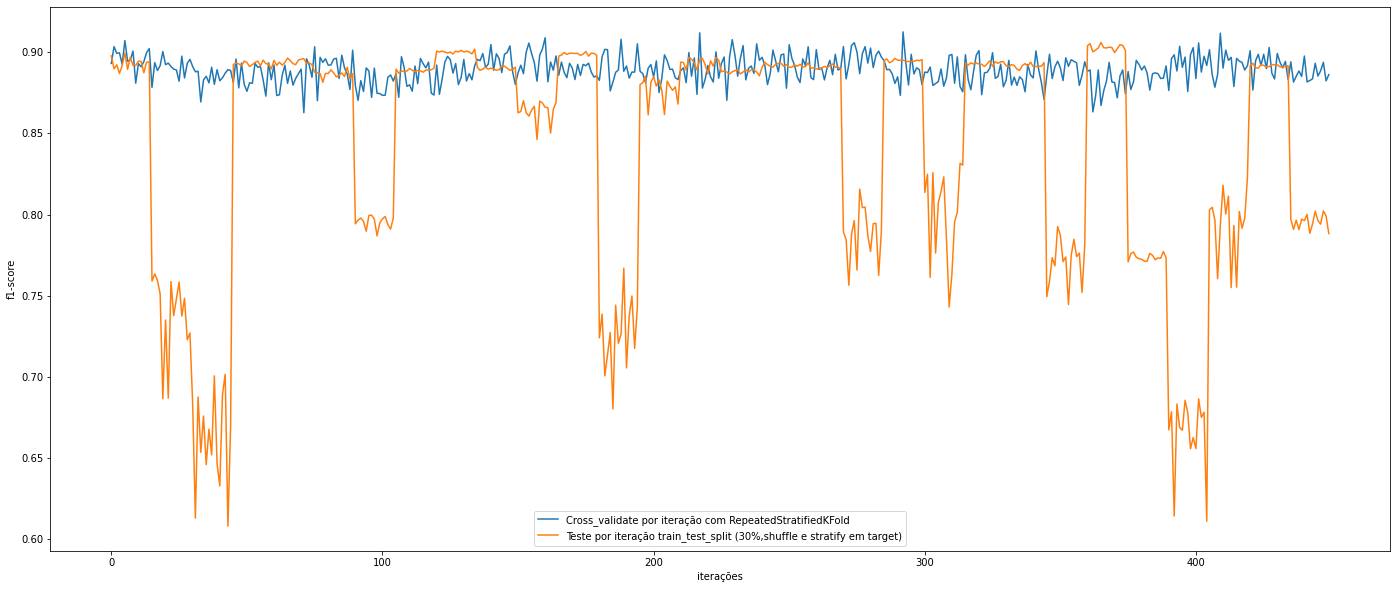

KNN -Dados Normalizados:  False
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9848651341185639
   Best hyperparameters: {'p': 1, 'n_neighbors': 2, 'leaf_size': 9}
   Melhor Crossval f1-score......: 0.99565 Média Crossval f1-score: 0.98482
   Melhor predição teste f1-score: 0.97793 Média teste f1-score...: 0.97527
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.974347886922892
   Best hyperparameters: {'p': 1, 'n_neighbors': 2, 'leaf_size': 9}
   Melhor Crossval f1-score......: 0.98392 Média Crossval f1-score: 0.97507
   Melhor predição teste f1-score: 0.97912 Média teste f1-score...: 0.97454
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9725191640878309
   Best hyperparameters: {'p': 1, 'n_neighbors': 2, 'leaf_size': 9}
   Melhor Crossval f1-score......: 0.98471 Média Crossval f1-score: 

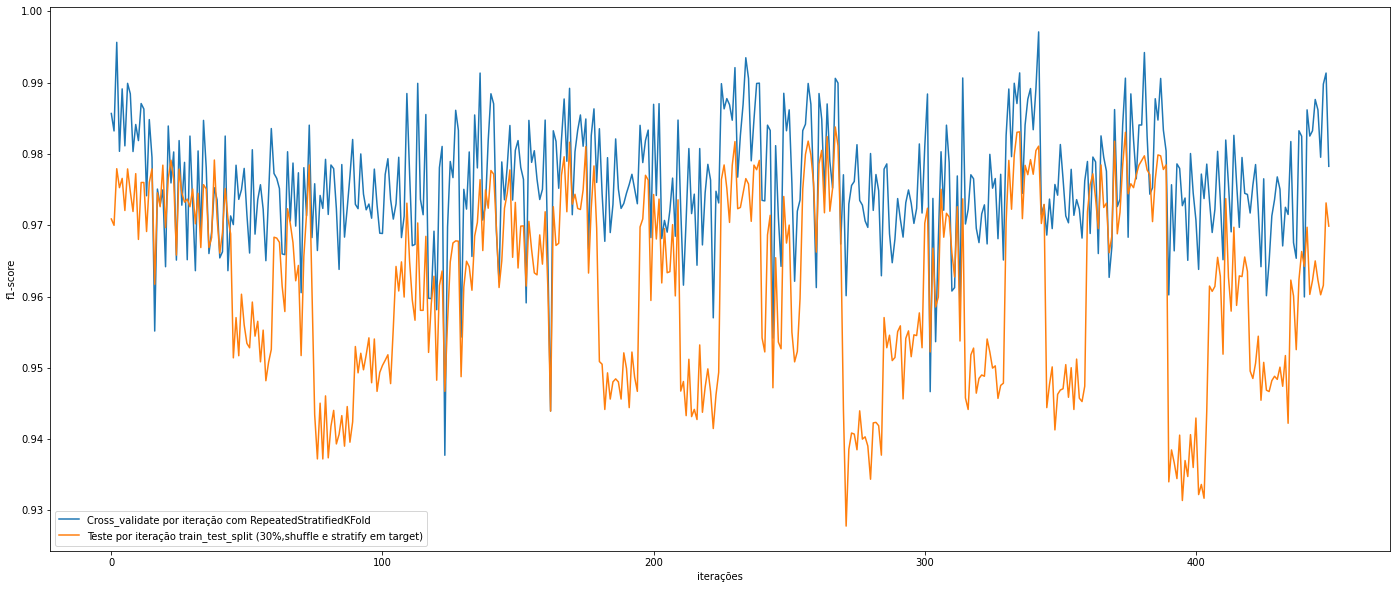

RF -Dados Normalizados:  False
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.992095694035374
   Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
   Melhor Crossval f1-score......: 0.99565 Média Crossval f1-score: 0.99280
   Melhor predição teste f1-score: 0.98374 Média teste f1-score...: 0.98050
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9901675098642708
   Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
   Melhor Crossval f1-score......: 0.99278 Média Crossval f1-score: 0.99060
   Melhor predição teste f1-score: 0.98299 Média teste f1-score...: 0.98104
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9905051817426961
   Best

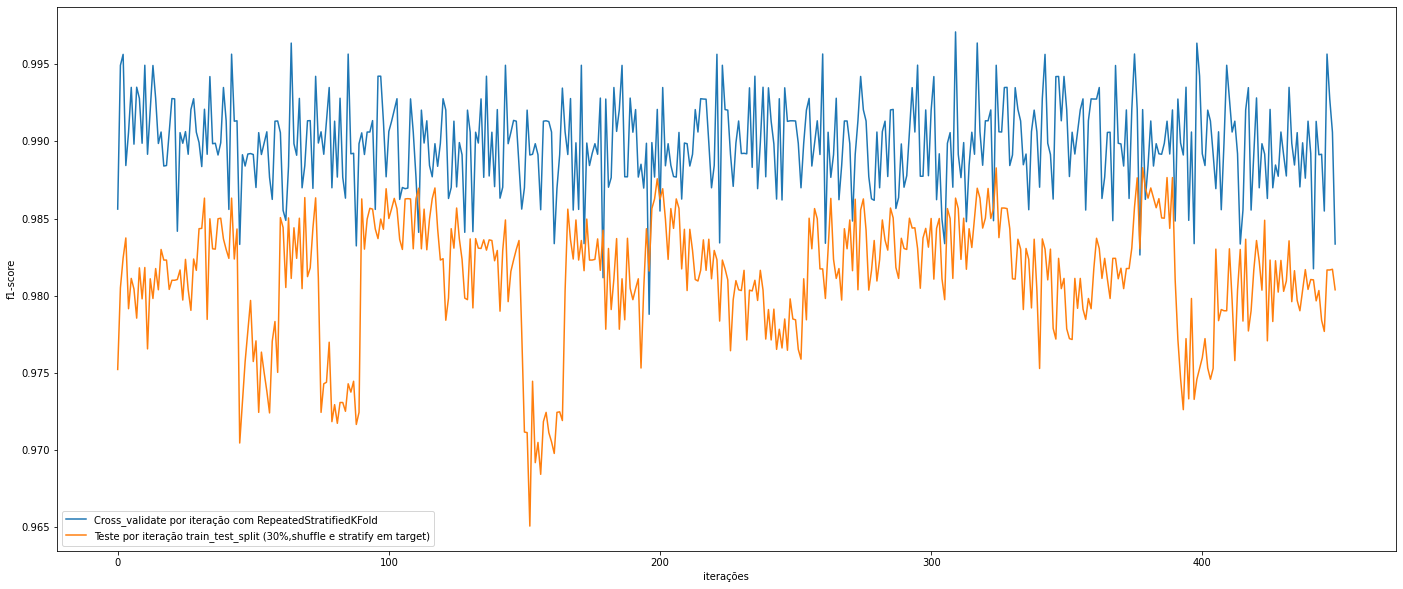

XGB -Dados Normalizados:  False
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9926739910081243
   Best hyperparameters: {'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.16}
   Melhor Crossval f1-score......: 0.99711 Média Crossval f1-score: 0.99277
   Melhor predição teste f1-score: 0.98703 Média teste f1-score...: 0.98380
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9909869581078663
   Best hyperparameters: {'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.16}
   Melhor Crossval f1-score......: 0.99568 Média Crossval f1-score: 0.99135
   Melhor predição teste f1-score: 0.98831 Média teste f1-score...: 0.98508
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9916618266368832
   Best hyperparameters: {'n_estimators': 400, 'min

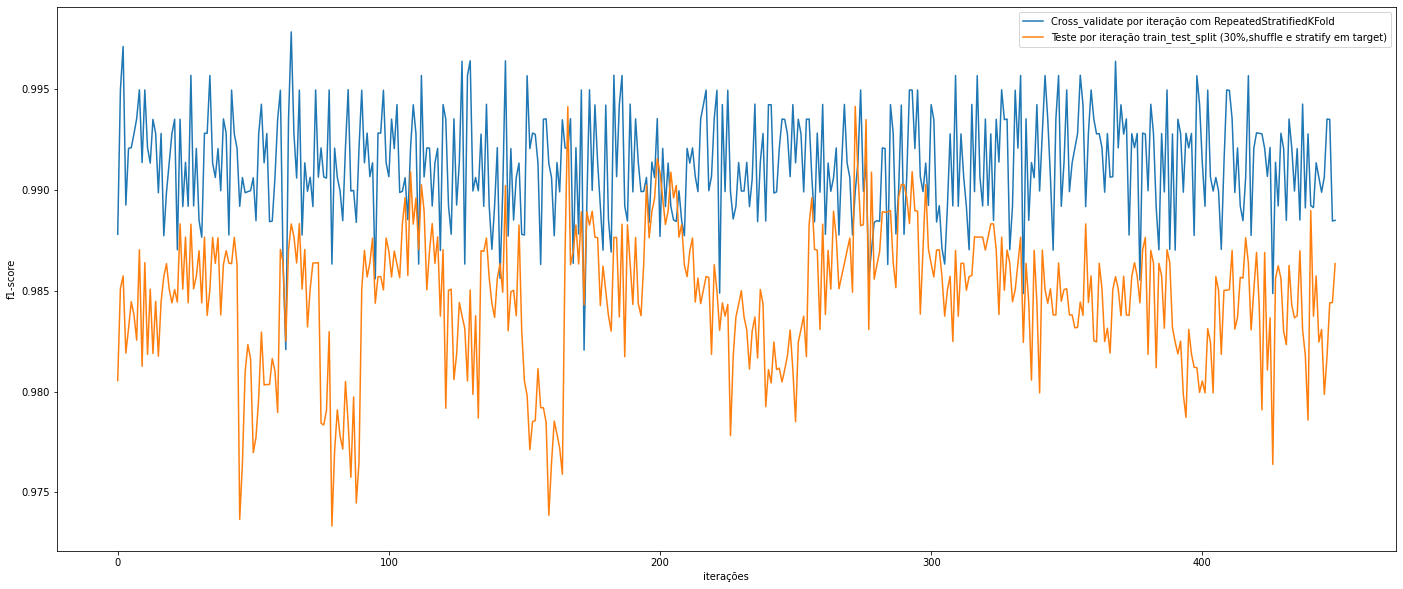

CAT -Dados Normalizados:  False
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9934450332980538
   Best hyperparameters: {'learning_rate': 0.15, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 7}
   Melhor Crossval f1-score......: 0.99639 Média Crossval f1-score: 0.99351
   Melhor predição teste f1-score: 0.98705 Média teste f1-score...: 0.98511
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9924810220957513
   Best hyperparameters: {'learning_rate': 0.15, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 7}
   Melhor Crossval f1-score......: 0.99566 Média Crossval f1-score: 0.99277
   Melhor predição teste f1-score: 0.98960 Média teste f1-score...: 0.98827
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9929148885436452
   Best hyperparameters: {'learning_rate': 0.15, 'l2_leaf_reg': 1, 'iterati

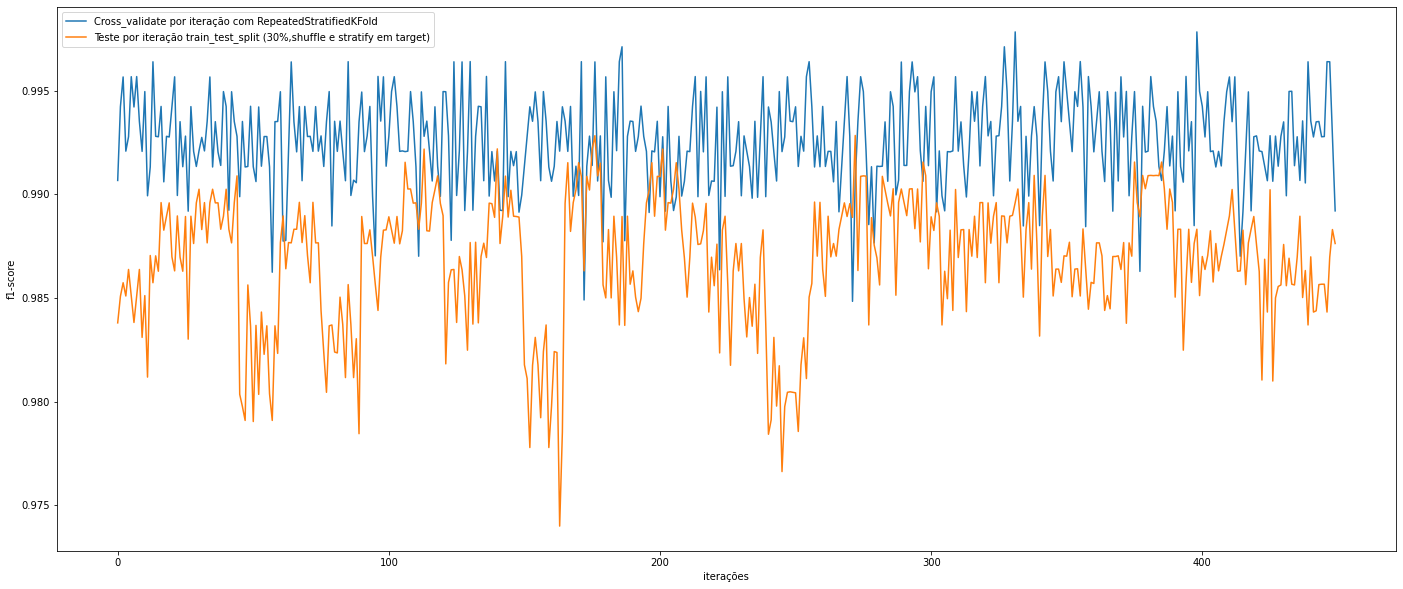

LGB -Dados Normalizados:  False
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9935415003386017
   Best hyperparameters: {'num_leaves': 1200, 'n_estimators': 200, 'max_depth': 75, 'learning_rate': 0.1}
   Melhor Crossval f1-score......: 0.99783 Média Crossval f1-score: 0.99351
   Melhor predição teste f1-score: 0.98833 Média teste f1-score...: 0.98702
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9926737735512141
   Best hyperparameters: {'num_leaves': 1200, 'n_estimators': 200, 'max_depth': 75, 'learning_rate': 0.1}
   Melhor Crossval f1-score......: 0.99567 Média Crossval f1-score: 0.99280
   Melhor predição teste f1-score: 0.99026 Média teste f1-score...: 0.98896
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9930115154660224
   Best hyperparameters: {'num_leaves': 1200, 'n_estimators

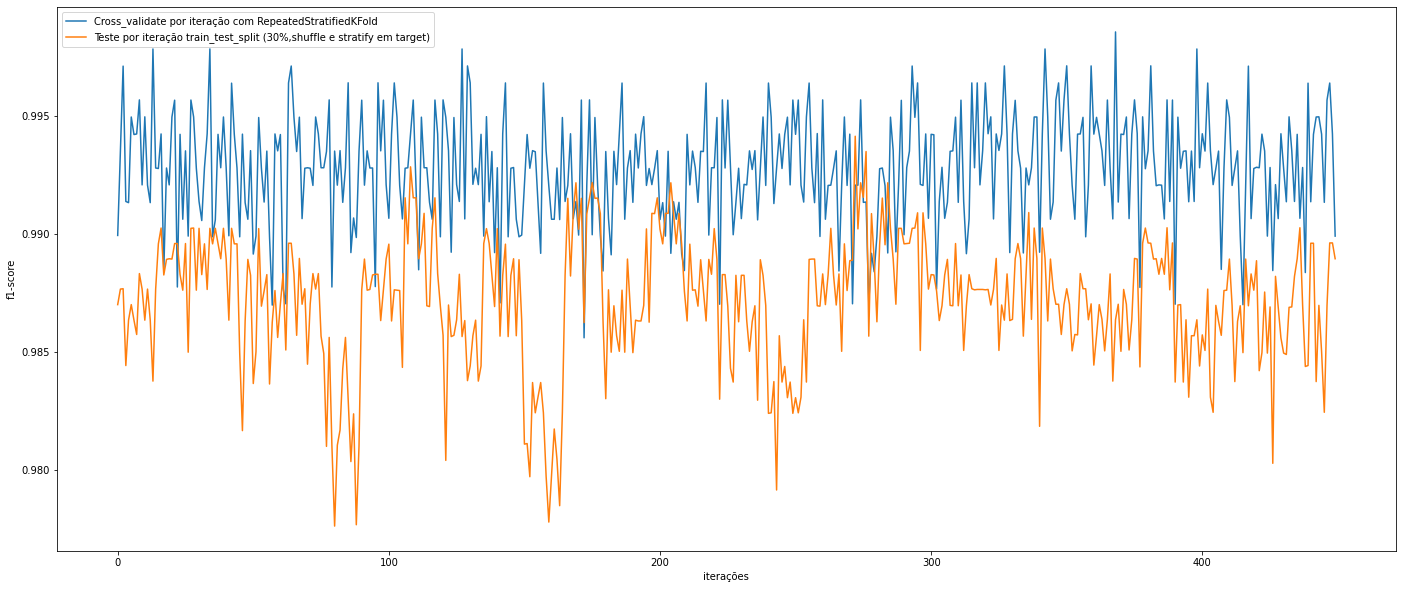

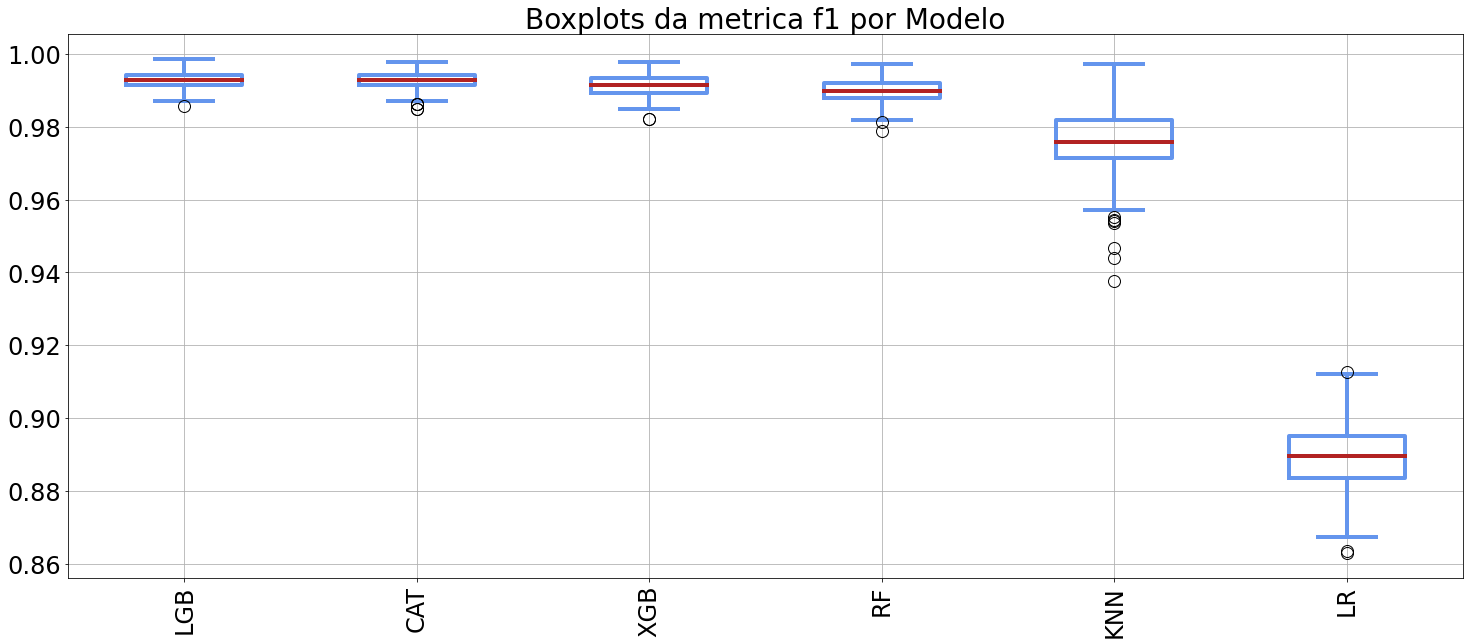

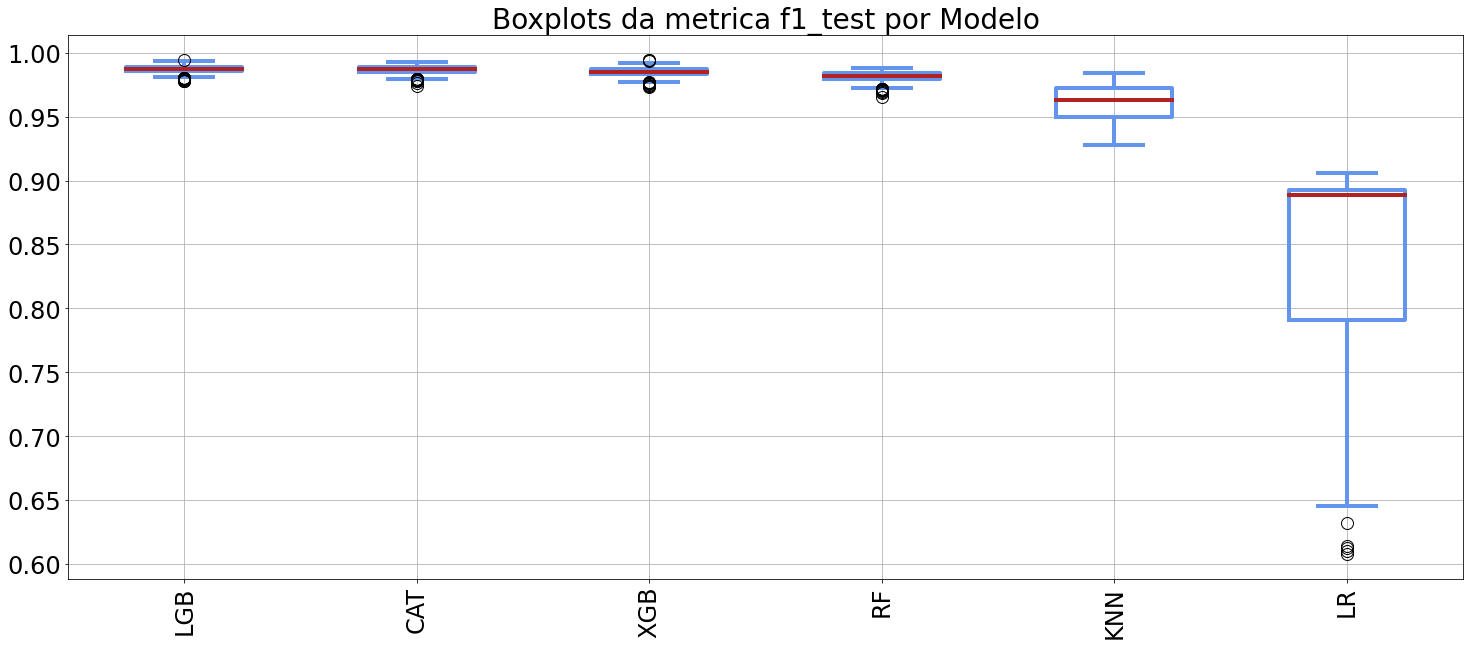

In [ ]:
# # Dados Pernambuco
num_folds=5
n_repeats=3
# Para simular a diferença das bases de dados
perc_train = 0.70
perc_test = 0.30
df_results = definedf_result()


config_experimento = {"tipodados":"semdadosacad","combalanceamento": "S",
                      "registralog":"N","Tiposplit": "MonteCarlo","otimizahiperparametros": "S","comnormalizacao": "N"}

featuressemdadosacad = ["var01","var02","var03",
                        "var10","var12","var13","var16",
                        "var17","var20","var21","var26","var27","var29"]

featurescomdadosacad = ["var01","var02","var03",
                        "var10","var12","var13","var16",
                        "var17","var20","var21","var26","var27","var29"]


# # Definindo X e y para avaliação dos algoritmos
y = df[var_y]
X = df

X_train = X
y_train = y
X_val = pd.DataFrame(columns=X_train.columns)
X_test = pd.DataFrame(columns=X_train.columns)
y_val = np.array([])
y_test = np.array([])
dfdadosteste = X_val
dfdadostreino = X_train

X, X_val, X_train = retorna_dados_selecionados(X_train,X_val)

print(len(X_train),len(X_val),df['Periodo'].count())

print(df.groupby([var_y])['Curso'].count())

X = X_train.loc[:,featuressemdadosacad]
y = y_train

reghiperparams = pd.DataFrame()
resultadosvalg = executa_cross_val_dados(X_train,y_train,"Experimento UPE")

In [ ]:
testwilcoxon(resultadosvalg,'f1_test')

LR -> KNN WilcoxonResult(statistic=0.0, pvalue=1.8524762278349491e-75)
LR -> RF WilcoxonResult(statistic=0.0, pvalue=1.8524659289458015e-75)
LR -> XGB WilcoxonResult(statistic=0.0, pvalue=1.8524659289458015e-75)
LR -> CAT WilcoxonResult(statistic=0.0, pvalue=1.8524607795226475e-75)
LR -> LGB WilcoxonResult(statistic=0.0, pvalue=1.8524607795226475e-75)
KNN -> LR WilcoxonResult(statistic=0.0, pvalue=1.8524762278349491e-75)
KNN -> RF WilcoxonResult(statistic=240.0, pvalue=1.3401109056545652e-74)
KNN -> XGB WilcoxonResult(statistic=5.0, pvalue=1.915379774702081e-75)
KNN -> CAT WilcoxonResult(statistic=0.0, pvalue=1.8524607795226475e-75)
KNN -> LGB WilcoxonResult(statistic=0.0, pvalue=1.8524659289458015e-75)
RF -> LR WilcoxonResult(statistic=0.0, pvalue=1.8524659289458015e-75)
RF -> KNN WilcoxonResult(statistic=240.0, pvalue=1.3401109056545652e-74)
RF -> XGB WilcoxonResult(statistic=2571.0, pvalue=3.4461813147516627e-68)
RF -> CAT WilcoxonResult(statistic=42.0, pvalue=2.451896328723437e-75)

In [ ]:
reghiperparams['teste'] = 0
reghiperparams.groupby(['modelo','hiperparam'],as_index=False)['teste'].count().sort_values(['modelo','teste'], ascending=False)

,modelo,hiperparam,teste
16,XGB,"{'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.16}",27
14,XGB,"{'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 50, 'learning_rate': 1.0}",1
15,XGB,"{'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 1.0}",1
17,XGB,"{'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 50, 'learning_rate': 0.16}",1
13,RF,"{'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}",30
7,LR,"{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 50, 'class_weight': 'balanced', 'C': 10}",8
8,LR,"{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 50, 'class_weight': 'none', 'C': 0.1}",7
11,LR,"{'solver': 'sag', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'none', 'C': 100}",5
12,LR,"{'solver': 'saga', 'penalty': 'none', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.001}",5
10,LR,"{'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 1000, 'class_weight': 'balanced', 'C': 0.1}",4


semdadosacad
Dados Normalizados:  False
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9944004480477917
   Best hyperparameters: {'num_leaves': 900, 'n_estimators': 200, 'max_depth': 25, 'learning_rate': 0.1}
Modelo:  LGB
semdadosacad


100%|===================| 9847/9882 [04:09<00:00]       

[18:10:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

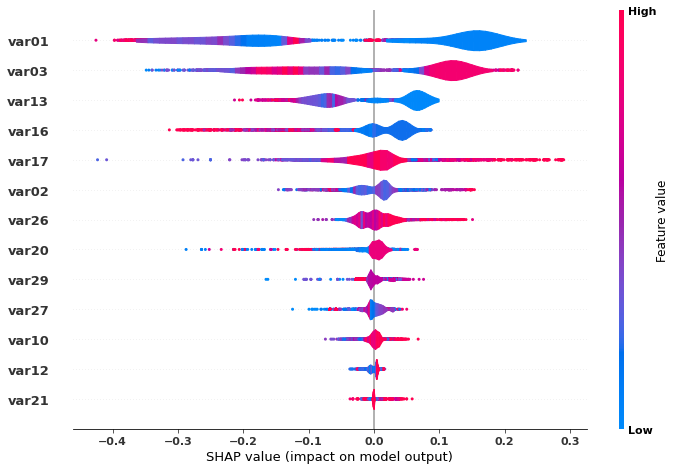

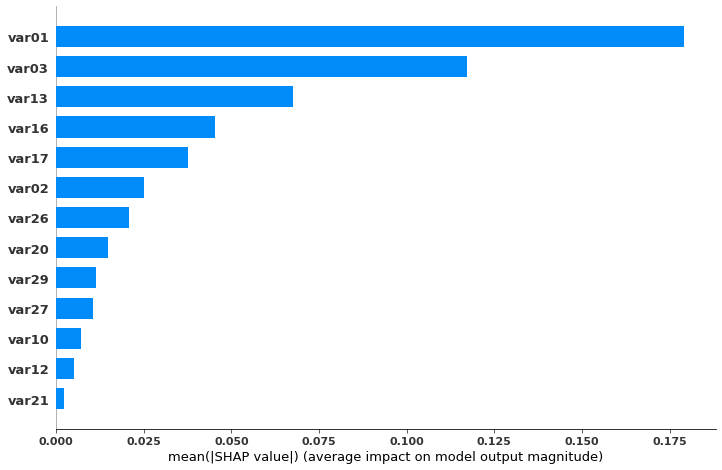

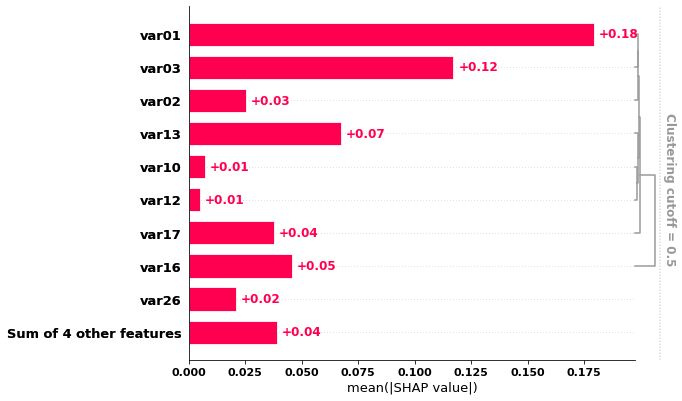

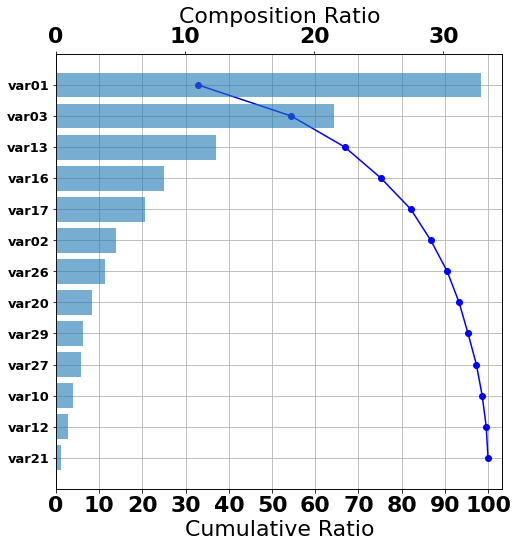

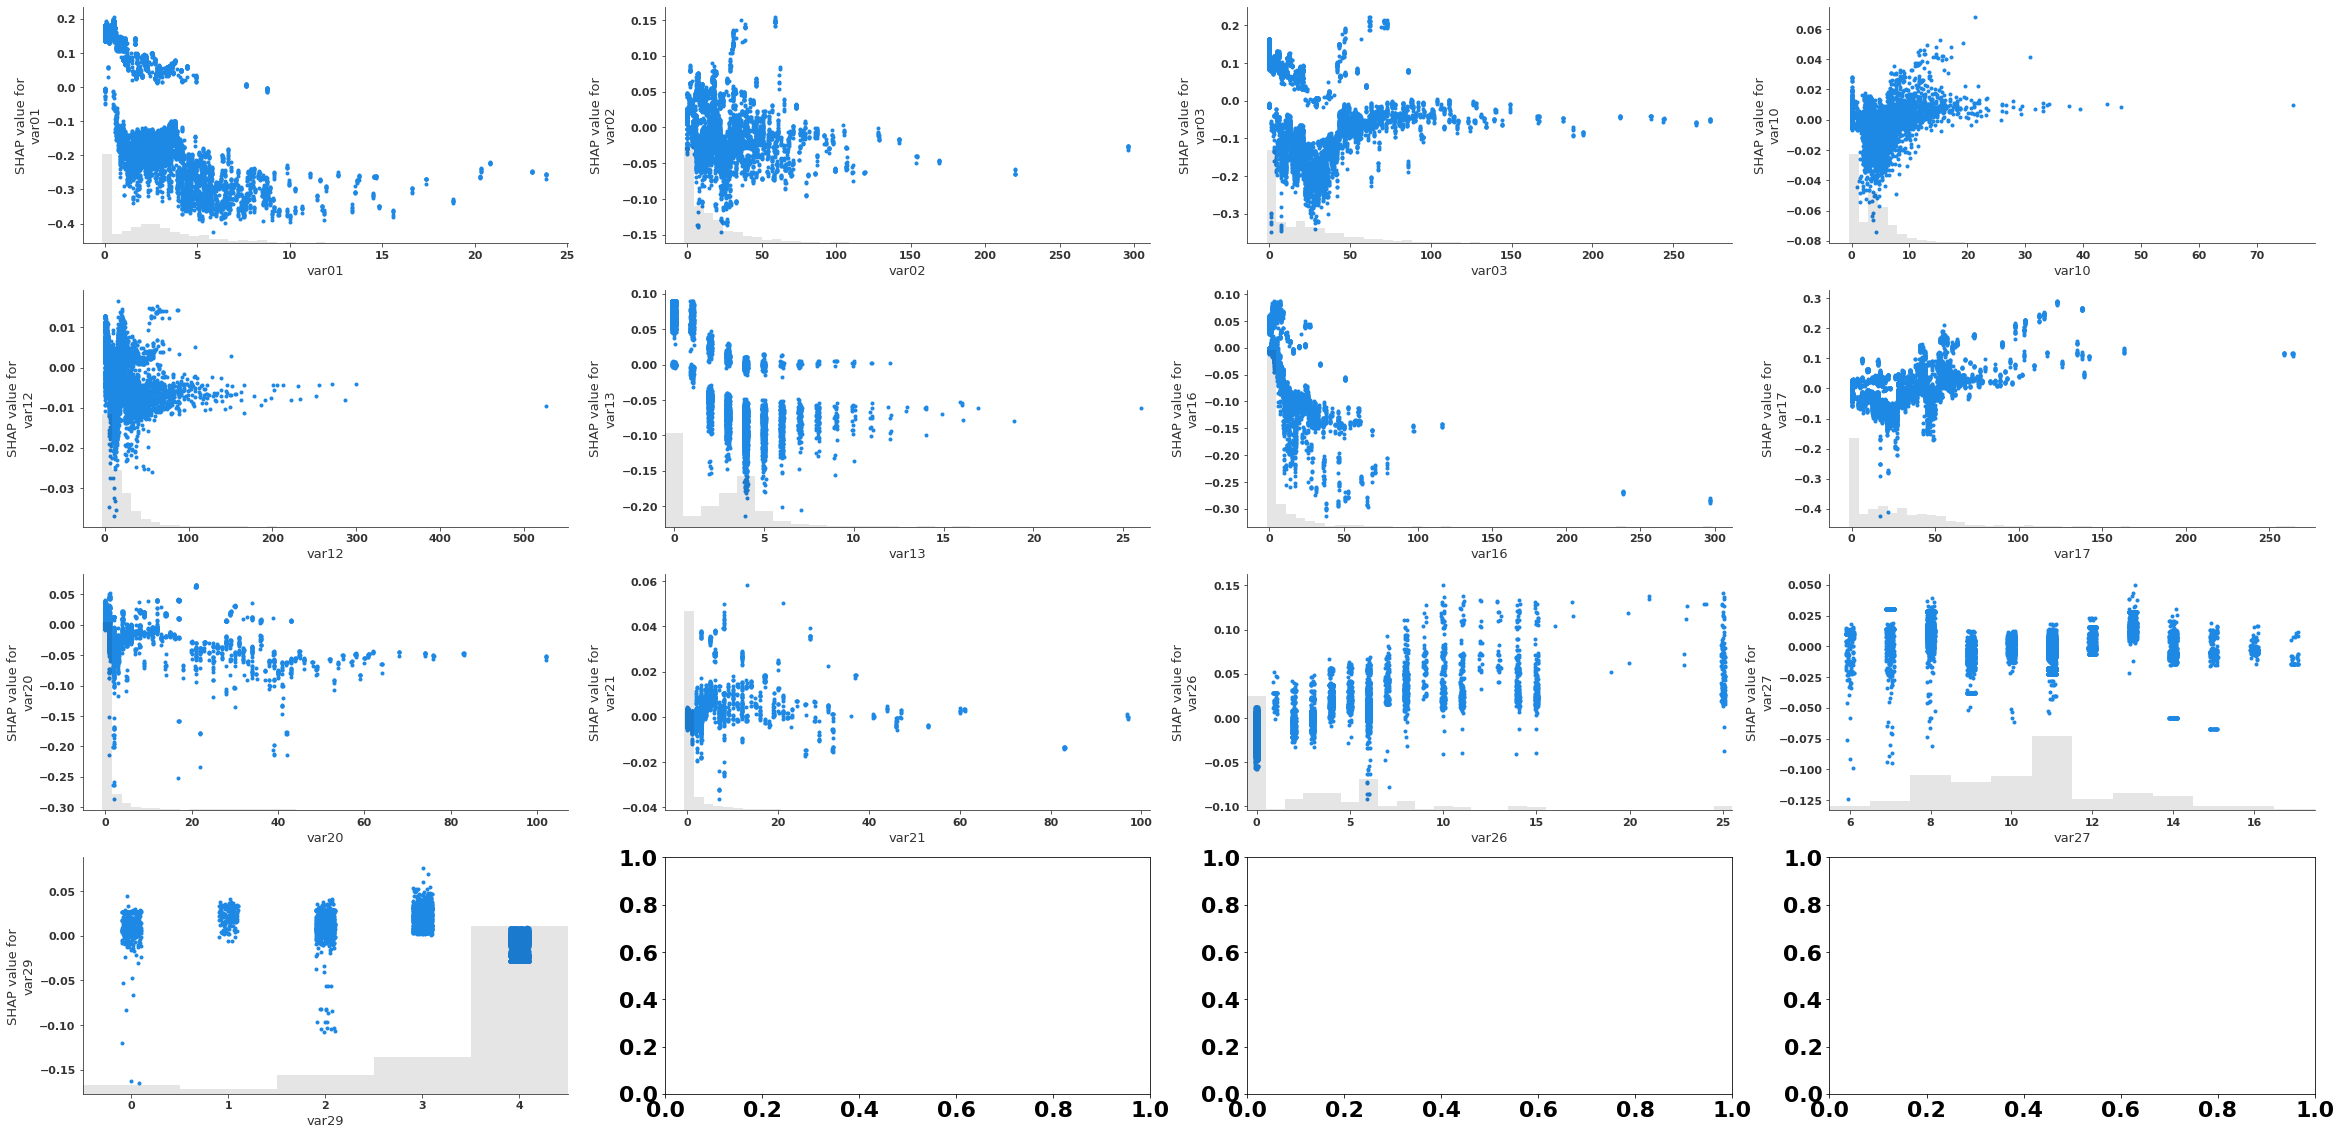

In [ ]:
modeloxai = retorna_modeloxai('LGB',X_train,y_train,"Experimento UPE",frtsaving='pdf')